In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [16]:
df = pd.read_csv(r"C:\Users\maxpi\Documents\data_ironhack\lab w5\amz_uk_price_prediction_dataset.csv")
df.columns 

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [18]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [4]:
category_counts = df['category'].value_counts()
print(category_counts)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Motorbike Chassis                            107
Alexa Built-In Devices                       107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64


In [5]:
top_5_categories = category_counts.head(5)
print("Top 5 most listed product categories:")
print(top_5_categories)


Top 5 most listed product categories:
category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


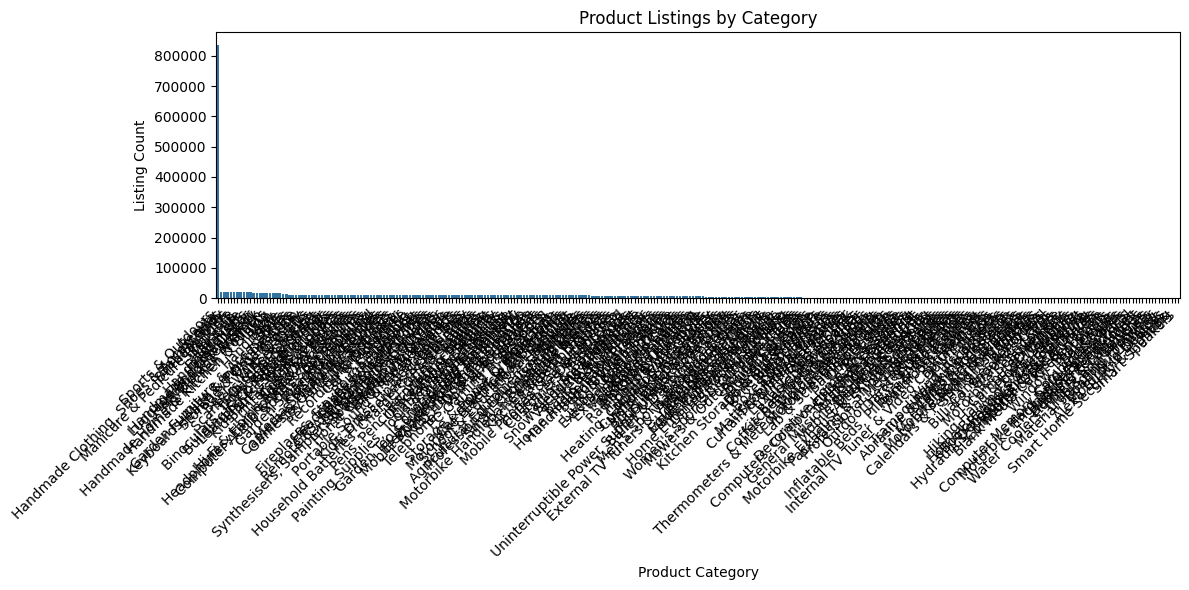

In [6]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title('Product Listings by Category')
plt.ylabel('Listing Count')
plt.xlabel('Product Category')
plt.tight_layout()
plt.show()

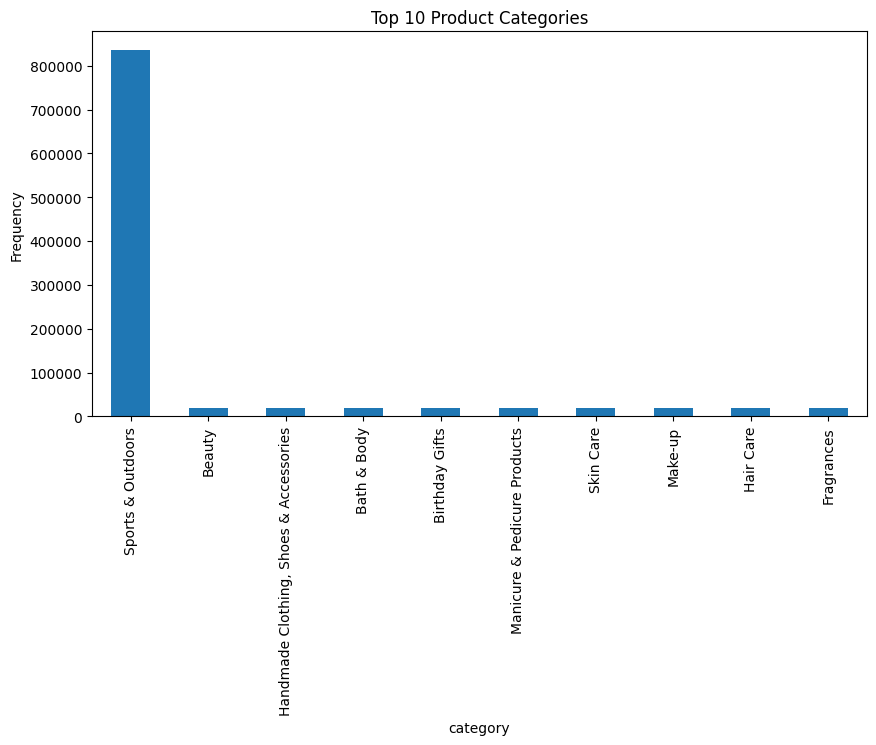

In [7]:
category_counts.head(10).plot(kind='bar', figsize=(10,5), title='Top 10 Product Categories')
plt.ylabel('Frequency')
plt.show()


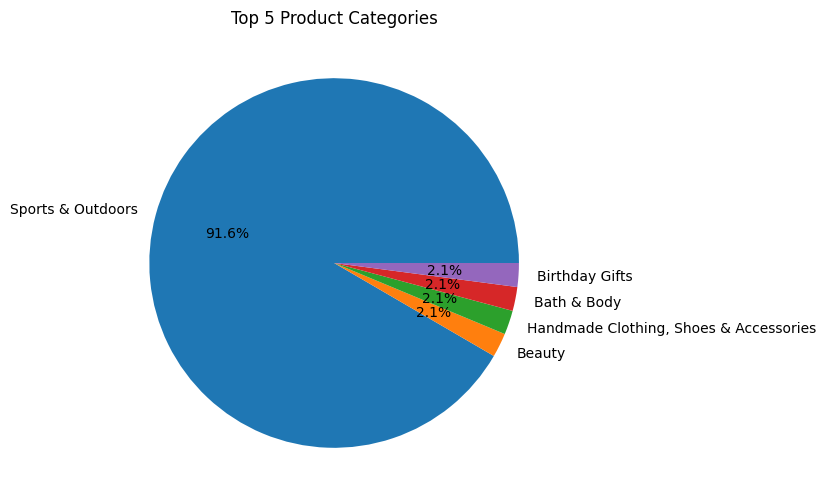

In [8]:
top_5_categories.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), title='Top 5 Product Categories')
plt.ylabel('')
plt.show()

In [9]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode().iloc[0]  

print(f"Mean Price: £{mean_price:.2f}")
print(f"Median Price: £{median_price:.2f}")
print(f"Mode Price: £{mode_price:.2f}")

Mean Price: £89.24
Median Price: £19.09
Mode Price: £9.99


In [10]:
price_variance = df['price'].var()
price_std = df['price'].std()
price_range = df['price'].max() - df['price'].min()
iqr = df['price'].quantile(0.75) - df['price'].quantile(0.25)

print(f"Variance: {price_variance:.2f}")
print(f"Standard Deviation: {price_std:.2f}")
print(f"Range: £{price_range:.2f}")
print(f"IQR (Interquartile Range): £{iqr:.2f}")

Variance: 119445.49
Standard Deviation: 345.61
Range: £100000.00
IQR (Interquartile Range): £36.00


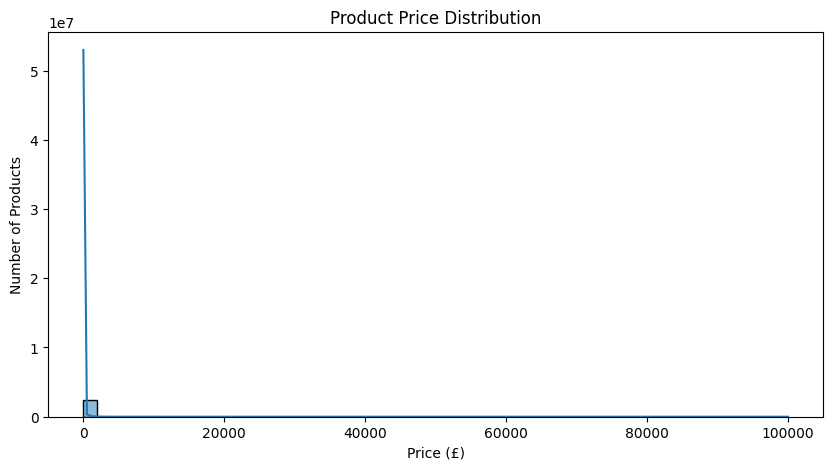

In [12]:

plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Product Price Distribution')
plt.xlabel('Price (£)')
plt.ylabel('Number of Products')
plt.show()


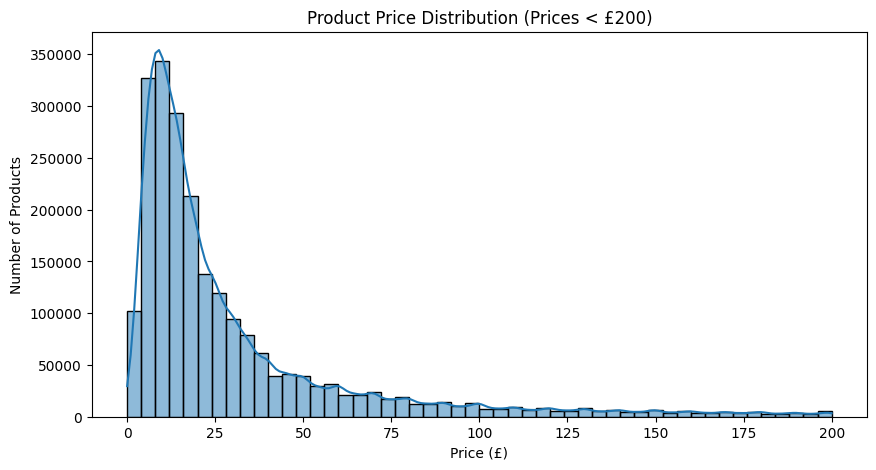

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(df[df['price'] < 200]['price'], bins=50, kde=True)
plt.title('Product Price Distribution (Prices < £200)')
plt.xlabel('Price (£)')
plt.ylabel('Number of Products')
plt.show()

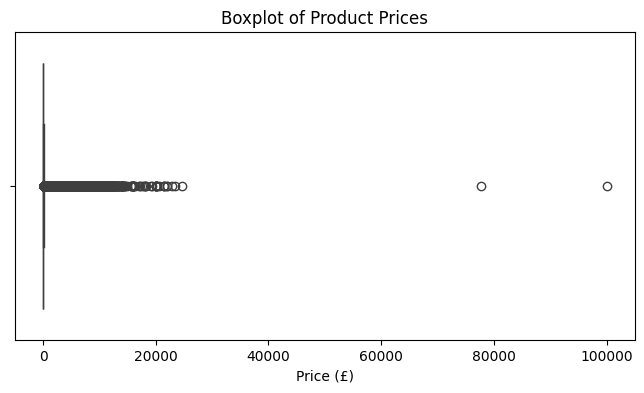

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Product Prices')
plt.xlabel('Price (£)')
plt.show()


In [19]:
rated_df = df[df['stars'] > 0]

mean_rating = rated_df['stars'].mean()
median_rating = rated_df['stars'].median()
mode_rating = rated_df['stars'].mode().iloc[0]

print(f"Mean star rating: {mean_rating:.2f}")
print(f"Median star rating: {median_rating:.2f}")
print(f"Mode star rating: {mode_rating:.2f}")

Mean star rating: 4.32
Median star rating: 4.40
Mode star rating: 4.50


In [20]:
rating_variance = df['stars'].var()
rating_std = df['stars'].std()
iqr_rating = df['stars'].quantile(0.75) - df['stars'].quantile(0.25)

print(f"Variance: {rating_variance:.2f}")
print(f"Standard Deviation: {rating_std:.2f}")
print(f"IQR (Interquartile Range): {iqr_rating:.2f}")

Variance: 4.82
Standard Deviation: 2.19
IQR (Interquartile Range): 4.40


In [23]:
from scipy.stats import skew, kurtosis

rating_skew = skew(df['stars'].dropna())
rating_kurtosis = kurtosis(df['stars'].dropna())

print(f"Skewness: {rating_skew:.2f}")
print(f"Kurtosis: {rating_kurtosis:.2f}")

Skewness: 0.08
Kurtosis: -1.93


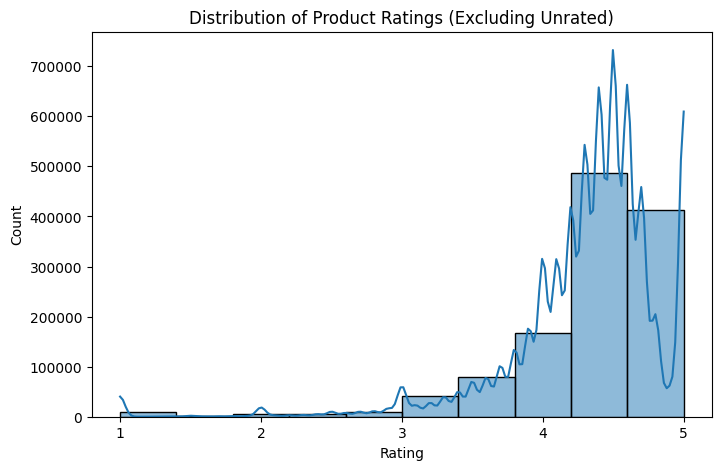

In [24]:


plt.figure(figsize=(8, 5))
sns.histplot(rated_df['stars'], bins=10, kde=True)
plt.title('Distribution of Product Ratings (Excluding Unrated)')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks([1, 2, 3, 4, 5])
plt.show()